In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [79]:
target = "A1"

In [80]:
hdu = fits.open(target+"Spec_SCI_SLIT_FLUX_MERGE1D_VIS.fits")
data = hdu[0].data
header = hdu[0].header
# get wl information from header
print(len(data))
print(header)

24318
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =                24318 / length of data axis 1                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H DATE    = '2018-09-13T07:24:32' / file creation date (YYYY-MM-DDThh:mm:ss UT)   LAMNLIN =                 4164 / No. of lines used in wavelength solution       LAMRMS  =  0.00308064435479327 / RMS of wavelength solution [CUNIT1]            CRDER1  = 4.77404165051823E-05 / Wavelength uncertainty [CUNIT1]                CSYER1  =                 0.02 / Typical systematic wavelength error [CUNIT1]   CUNIT1  = 'nm      '              

In [81]:
start_wl = 533.6
step_wl = 0.02
end_wl = start_wl + step_wl*len(data)
wl_vis = np.arange(start_wl,end_wl,step_wl)
print(len(wl_vis))

24318


In [82]:
flux_vis = data * 1e16
print(np.average(flux_vis))

9.474295


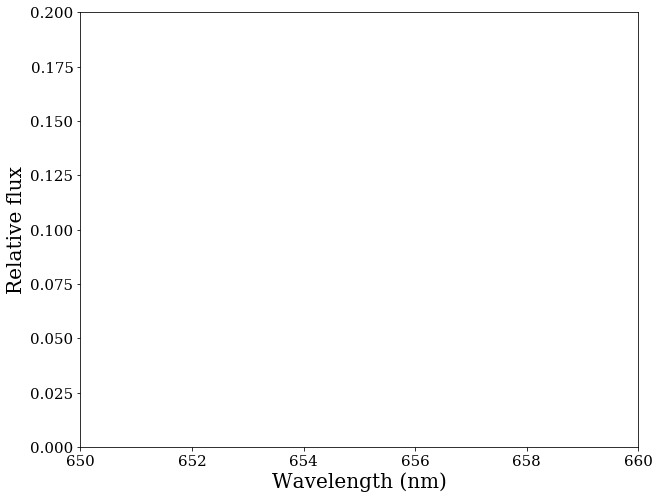

In [83]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='15')
plt.rc('ytick', labelsize='15')
fig = plt.figure(figsize=(10, 8))

plt.xlabel('Wavelength (nm)',fontsize=20)
plt.ylabel('Relative flux', fontsize=20)
plt.xlim(650,660)
plt.ylim(0,0.2)
plt.plot(wl_vis,flux_vis)

In [84]:
hdu = fits.open(target+"Spec_SCI_SLIT_FLUX_MERGE1D_NIR.fits")
data = hdu[0].data
header = hdu[0].header
# get wl information from header
print(len(data))
print(header)

24750
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =                24750 / length of data axis 1                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H DATE    = '2018-09-13T07:34:34' / file creation date (YYYY-MM-DDThh:mm:ss UT)   LAMNLIN =                 1781 / No. of lines used in wavelength solution       LAMRMS  =   0.0108381723824654 / RMS of wavelength solution [CUNIT1]            CRDER1  = 0.000256817192800068 / Wavelength uncertainty [CUNIT1]                CSYER1  =                0.004 / Typical systematic wavelength error [CUNIT1]   CUNIT1  = 'nm      '              

In [85]:
start_wl = 994.02
step_wl = 0.06
end_wl = start_wl + step_wl*len(data)
wl_nir = np.arange(start_wl,end_wl,step_wl)
print(len(wl_nir))

24750


In [86]:
flux_nir = data * 1e16
print(np.average(flux_nir))

8.294855


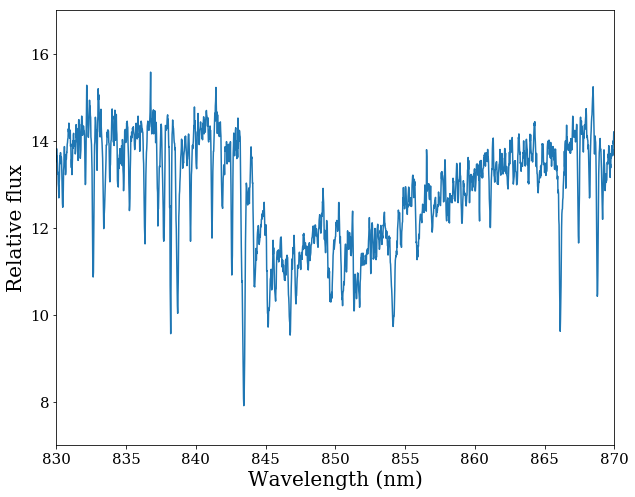

In [96]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='15')
plt.rc('ytick', labelsize='15')
fig = plt.figure(figsize=(10, 8))

plt.xlabel('Wavelength (nm)',fontsize=20)
plt.ylabel('Relative flux', fontsize=20)
plt.xlim(830,870)
plt.ylim(7,17)
plt.plot(wl_vis,flux_vis)
plt.plot(wl_nir,flux_nir)

Spectral type using H2O index: M0 is 0, M5 is 5, L0 is 10.
For C3: L1.1, exactly as published

In [78]:
wl_sel = np.where((wl_nir>1492) & (wl_nir<1502))
h2o_index_1 = np.average(flux_nir[wl_sel])
wl_sel = np.where((wl_nir>1550) & (wl_nir<1560))
h2o_index_2 = np.average(flux_nir[wl_sel])
h2o_index = h2o_index_2 / h2o_index_1
print('H2O Index: ', h2o_index)
spt = (h2o_index - 0.75) / 0.044
print('Spectral type: ',spt)

H2O Index:  1.2342991
Spectral type:  11.006796901876276
